In [1]:
from __future__ import division #for proper integer division
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

#users data
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

#friendships data
friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

#interests data -- interests by user_id
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]



In [2]:
#create 'friends' list for users
for user in users:
    user["friends"] = []

    
#populate the lists    
for i,j in friendships:
    users[i]["friends"].append(users[j]) #add j as a friend of i
    users[j]["friends"].append(users[i]) #add i as a friend of j
    
print(users[1])

{'id': 1, 'name': 'Dunn', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [{...}, {'id': 2, 'name': 'Sue', 'friends': [{...}, {...}, {'id': 3, 'name': 'Chi', 'friends': [{...}, {...}, {'id': 4, 'name': 'Thor', 'friends': [{...}, {'id': 5, 'name': 'Clive', 'friends': [{...}, {'id': 6, 'name': 'Hicks', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{...}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]}, {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]}, {'id': 7, 'name': 'Devin', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'friends': [{'id': 6, 'name': 'Hicks', 'friends': [{...}, {...}]}, {...}, {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]}]}]}]}]}]}, {'id': 2, 'name': 'Sue', 'friends': [{'id': 0, 'name': 'Hero', 'friends': [{...}, {...}]}, {...}, {'id': 3, 'name': 'Chi', 'friends': [{...}, {...}, {'id': 4, 'name': 'Thor', 'friends': [{...}, {'id': 5, 'name': 'Clive', 'friends': [{...}, {'id': 6, 'name': 'Hicks', 'friends': [{...}, {'id': 8, 'name': 'Kate', 'frien

In [3]:
#total number of connections
def number_of_friends(user):
    return len(user["friends"])

total_connections = sum(number_of_friends(user)
                       for user in users)

print(total_connections)

24


In [4]:
#calculate average number of connections

num_users = len(users)
avg_connections = total_connections / num_users

print(avg_connections)

2.4


In [5]:
#find most connected people (users with most friends)

#first we create a list with user_id and number of friends, 
num_friends_by_id = [(user["id"], number_of_friends(user))
                    for user in users]

print(num_friends_by_id)

#then we sort it
sorted_num_friends_by_id = sorted(num_friends_by_id,
       key=lambda x: int(x[1]),
       reverse=True)
                            

print(sorted_num_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [6]:
#data scientists you may know -- recommend friends
#first thing would be to recommend friends of friends: this is wrong
def friends_of_friends_ids_0(user):
    return [foaf["id"]                     #for each user -
            for friend in user["friends"]  #take their friends
            for foaf in friend["friends"]] #get each friend's friends
            
print(friends_of_friends_ids_0(users[0]))

#if we look at user 0's friends of friends we get repeats (friends of my friends that are already my friends)
#and we get user 0 (i am a friend of my friends)

[0, 2, 3, 0, 1, 3]


In [7]:
#checker function to eliminate repeats
def not_the_same(user1, user2):
    return user1["id"] != user2["id"]

#function to check if user2 is already a friend of user 1
def not_friends(user1, user2):
    return all(not_the_same(friend, user2)
              for friend in user1["friends"])

#function that returns my friends' friends that are not me and not my friends.
def friends_of_friends_ids(user):
    return Counter(foaf["id"]
                  for friend in user["friends"] #for each of user friends
                  for foaf in friend["friends"] #count their(friends') friends
                  if not_the_same(user,foaf)    #who are not me
                  and not_friends(user,foaf))   #and are not my friends


print(friends_of_friends_ids(users[3]))
    



Counter({0: 2, 5: 1})


In [8]:
#return user ids of users with interest in X

def data_scientist_who_like(target_interest):
    return [user_id 
            for user_id, user_interest in interests
            if user_interest == target_interest]

print(data_scientist_who_like('Big Data'))

[0, 8, 9]


In [9]:
#keys are interests, values are lists of users_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
print(user_ids_by_interest)

#keys are user_ids, values are lists of interests that user has

interests_by_user_ids = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_ids[user_id].append(interest)
    
print(interests_by_user_ids)

defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression'

In [10]:
#MYSHIT - trying to see if there is a correlation between number of interest and number of friends

friends_per_user = []
interests_per_user = []

for user in users:
    friends_per_user.append(number_of_friends(user))
    
for i in range(len(users)):
    interests_per_user.append(len(interests_by_user_ids[i]))
    
print(friends_per_user, interests_per_user)

[2, 3, 3, 3, 2, 3, 2, 2, 3, 1] [7, 5, 6, 5, 4, 6, 4, 4, 4, 4]


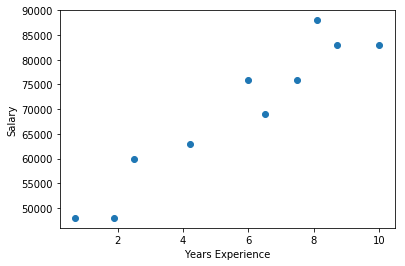

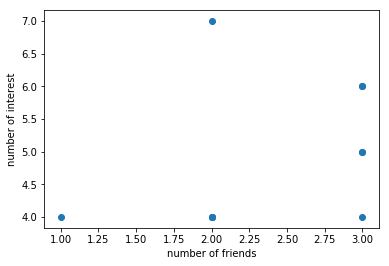

In [11]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]


tenures = [tenure for salary, tenure in salaries_and_tenures]
salaries = [salary for salary, tenure in salaries_and_tenures]
plt.scatter(tenures, salaries)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

#MYSHIT
plt.scatter(friends_per_user, interests_per_user)
plt.xlabel("number of friends")
plt.ylabel("number of interest")
plt.show()

In [12]:
# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

salary_by_tenure

#this does not give us any additional information, we need to bucket

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [13]:
#first we define the buckets

def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

#then we group the salaries corresponding to each of the buckets
#keys are tenure buckets, values are the average salary for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
#then we calculate averages for each tenure bucket
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print((average_salary_by_bucket["more than five"]/average_salary_by_bucket["less than two"]-1)*100)

64.93055555555556


In [30]:
#now we want to find which interests are most common among users

words_and_counts=Counter(word
                        for user, interest in interests
                        for word in interest.lower().split(","))

print(words_and_counts)

for word, count in words_and_counts.most_common():
    if count>1:
        print(word, count)

Counter({'big data': 3, 'java': 3, 'python': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine learning': 2, 'neural networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep learning': 1, 'artificial intelligence': 1, 'mapreduce': 1})
big data 3
java 3
python 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine learning 2
neural networks 2


In [25]:
if __name__ == "__main__":

    print()
    print("######################")
    print("#")
    print("# FINDING KEY CONNECTORS")
    print("#")
    print("######################")
    print()


    print("total connections", total_connections)
    print("number of users", num_users)
    print("average connections", total_connections / num_users)
    print()

    # create a list (user_id, number_of_friends)
    num_friends_by_id = [(user["id"], number_of_friends(user))
                         for user in users]

    print("users sorted by number of friends:")
    print(sorted(num_friends_by_id,
                 key=lambda pair: pair[1],                       # by number of friends
                 reverse=True))                                  # largest to smallest

    print()
    print("######################")
    print("#")
    print("# DATA SCIENTISTS YOU MAY KNOW")
    print("#")
    print("######################")
    print()


    print("friends of friends bad for user 0:", friends_of_friends_ids_0(users[0]))
    print("friends of friends for user 3:", friends_of_friends_ids(users[3]))

    print()
    print("######################")
    print("#")
    print("# SALARIES AND TENURES")
    print("#")
    print("######################")
    print()

    print("average salary by tenure", average_salary_by_tenure)
    print("average salary by tenure bucket", average_salary_by_bucket)

    print()
    print("######################")
    print("#")
    print("# MOST COMMON WORDS")
    print("#")
    print("######################")
    print()

    for word, count in words_and_counts.most_common():
        if count > 1:
            print(word, count)


######################
#
# FINDING KEY CONNECTORS
#
######################

total connections 24
number of users 10
average connections 2.4

users sorted by number of friends:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

######################
#
# DATA SCIENTISTS YOU MAY KNOW
#
######################

friends of friends bad for user 0: [0, 2, 3, 0, 1, 3]
friends of friends for user 3: Counter({0: 2, 5: 1})

######################
#
# SALARIES AND TENURES
#
######################

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}

######################
#
# MOST COMMON WORDS
#
######################

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2